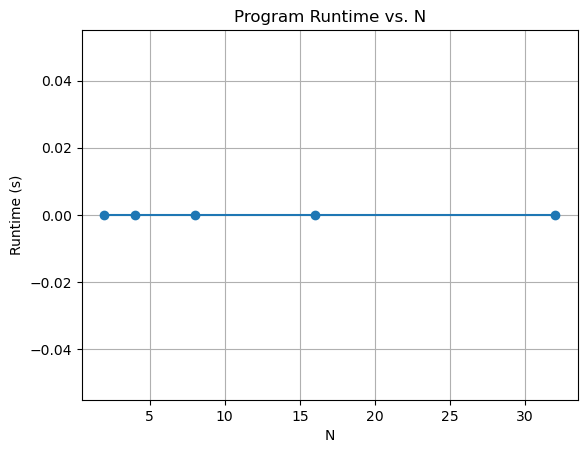

In [4]:
import subprocess
import re
import matplotlib.pyplot as plt

n_values = [2, 4, 8, 16, 32]  # Add more N values as needed
runtimes = []

for n in n_values:
    cmd = f'./montecarlo {n}'
    result = subprocess.run(cmd, shell=True, capture_output=True, text=True, check=True)
    time_output = result.stderr.splitlines()
    
    real_time_str = next((line for line in time_output if line.startswith("real")), None)
    user_time_str = next((line for line in time_output if line.startswith("user")), None)
    
    real_time = float(re.search(r'(\d+\.\d+)', real_time_str).group(1)) if real_time_str else 0.0
    user_time = float(re.search(r'(\d+\.\d+)', user_time_str).group(1)) if user_time_str else 0.0
    
    runtimes.append(real_time)

plt.plot(n_values, runtimes, marker='o')
plt.title('Program Runtime vs. N')
plt.xlabel('N')
plt.ylabel('Runtime (s)')
plt.grid()
plt.show()
